Plot MFD of an earthquake catalogue and mean slip on a patch vs magnitude.

In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import fnmatch
import os
import numpy as np
import pandas as pd

# # Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
#fault_dir = "../../../data/shaw2021/rundir5091"
fault_dir = "../../../data/subduction"
catalogue_dir = fault_dir

Read in faults and earthquake catalogue. The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462. Using subduction catalogue and fault model only to save RAM.

In [2]:
fault_model = RsqSimMultiFault.read_fault_file_keith(os.path.join(fault_dir,"hik_creep.flt"))
eq_catalogue = RsqSimCatalogue.from_csv_and_arrays(os.path.join(catalogue_dir,"trimmed"))

#fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
#                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
#                                                     transform_from_utm=True)
#eq_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
#                                                                list_file_directory=catalogue_dir, list_file_prefix="catalog")

Plot magnitude frequency distribution (number of events per year greater than a given magnitude against magnitude)

Filtering for 7.0

Filtering for 7.5

Filtering for 8.0

Filtering for 8.5

Filtering for 9.0

plotting


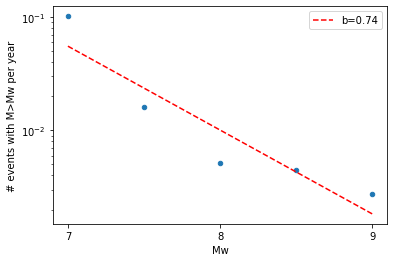

In [3]:
eq_catalogue.plot_gr(fault_model,write="Figures/Scaling/GR_subd.jpg",show=True)

Plot GR for an individual fault or system of faults in the fault model

In [4]:
main_fault="hope"
faults2select = [name for name in fault_model.names if fnmatch.fnmatch(name, main_fault+"*")]
fault_selection=RsqSimMultiFault([fault_model.name_dic[name] for name in faults2select])
fault_cat=eq_catalogue.filter_by_fault(fault_or_faults=fault_selection)
fault_cat.plot_gr(fault_model,write="Figures/"+main_fault+"_GR.jpg",show=True)

No events found on the following faults:


TypeError: 'RsqSimMultiFault' object is not iterable

Plot mean slip against magnitude for a given catalogue and fault model.
From scaling relations:
 $\frac{\bar{u}}{L}\sim constant$ and $M_{0} = \mu \bar{u} L W = \frac{\mu \bar{u} L^{2}}{\sin \delta}$
 (assuming a planar surface and that fault length, L = seismogenic thickness).
 These relations  $\Rightarrow M_{0} \propto \bar{u}^3$.
 and since $M_{W} \sim \log_{10} M_{0} $
 we expect $\log_{10} \bar{u} \sim \frac{1}{3} M_{W}$

In [ ]:
eq_catalogue.plot_mean_slip_vs_mag(fault_model,write="Figures/Scaling/slip_mw_subd.jpg", show=True)

Plot log (area) against magnitude for a given catalogue and fault model.
Different scaling relations between M$_W$ and M$_0$ will give different expected gradients for this relationship.

In [ ]:
eq_catalogue.plot_area_vs_mag(fault_model, write="Figures/Scaling/area_mw_subd.jpg", show=True)